# Лабораторная работа #4
### Варламов Никита, М33361; Гайнанов Ильдар, М33371;

In [371]:
import pandas as pd

df = pd.read_csv('fifa_players_stats.csv')
df

,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,...,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
0,L. Messi,Lionel Messi,91,91,54000000,RW,CAM,Argentina,https://cdn.sofifa.net/players/158/023/23_60.png,35,...,91,88,91,67,66,67,62,53,62,22
1,K. Benzema,Karim Benzema,91,91,64000000,"CF,ST",CF,France,https://cdn.sofifa.net/players/165/153/23_60.png,34,...,89,84,89,67,67,67,63,58,63,21
2,R. Lewandowski,Robert Lewandowski,91,91,84000000,ST,ST,Poland,https://cdn.sofifa.net/players/188/545/23_60.png,33,...,86,83,86,67,69,67,64,63,64,22
3,K. De Bruyne,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,https://cdn.sofifa.net/players/192/985/23_60.png,31,...,91,91,91,82,82,82,78,72,78,24
4,K. Mbappé,Kylian Mbappé,91,95,190500000,"ST,LW",ST,France,https://cdn.sofifa.net/players/231/747/23_60.png,23,...,92,84,92,70,66,70,66,57,66,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18534,D. Collins,Darren Collins,47,56,110000,"ST,RM",CAM,Republic of Ireland,https://cdn.sofifa.net/players/243/725/23_60.png,21,...,50,44,50,41,38,41,40,36,40,15
18535,Yang Dejiang,Dejiang Yang,47,57,90000,CDM,CDM,China PR,https://cdn.sofifa.net/players/261/933/23_60.png,17,...,45,45,45,47,48,47,49,49,49,15
18536,L. Mullan,Liam Mullan,47,67,130000,CM,RM,Northern Ireland,https://cdn.sofifa.net/players/267/823/23_60.png,18,...,52,49,52,46,44,46,46,42,46,17
18537,D. McCallion,Daithí McCallion,47,61,100000,CB,CB,Republic of Ireland,https://cdn.sofifa.net/players/267/824/23_60.png,17,...,33,33,33,44,42,44,47,49,47,15


Задание 1. Проверяем согласованность Overall с нормальным законом

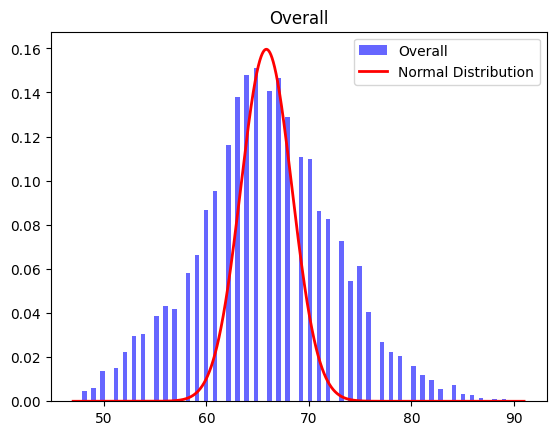

In [372]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

def plot_bins(data, title, std=None):
    plt.hist(data, bins=100, density=True, alpha=0.6, color='b', label=title)
    x = np.linspace(min(data), max(data), 10000)
    if std != None:
        plt.plot(x, norm.pdf(x, data.mean(), std), 'r-', lw=2, label='Normal Distribution')
    plt.title(title)
    plt.legend()
    plt.show()
    
plot_bins(df['Overall'], "Overall", 2.5)

Как видно по графику, распределены они не по нормальному закону. Попробуем статистические тесты! Первым используем критерий Шапиро-Уилла (Shapiro-Will). Нулевая гипотеза $H_0$ в этом случае: выборка распределена нормально.

In [373]:
from scipy.stats import shapiro

shapiro(df['Overall'])

/usr/lib/python3.11/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9953895211219788, pvalue=1.3840211172417113e-23)

pvalue < 0.05, следовательно $H_0$ отвергаем. Попробуем ещё какой-нибудь тест, например Колмогорова-Смирнова: 

In [374]:
from scipy.stats import kstest

kstest(df['Overall'], "norm")

KstestResult(statistic=1.0, pvalue=0.0, statistic_location=47, statistic_sign=-1)

И тест Харке — Бера:

In [375]:
from scipy.stats import jarque_bera

jarque_bera(df['Overall'])

SignificanceResult(statistic=51.76288176314877, pvalue=5.752187598415661e-12)

2. Проверить гипотезу однородности для французских и немецких футболистов (Overall): 


In [376]:
french = df[df['Nationality'] == 'France']
french

,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,...,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
1,K. Benzema,Karim Benzema,91,91,64000000,"CF,ST",CF,France,https://cdn.sofifa.net/players/165/153/23_60.png,34,...,89,84,89,67,67,67,63,58,63,21
4,K. Mbappé,Kylian Mbappé,91,95,190500000,"ST,LW",ST,France,https://cdn.sofifa.net/players/231/747/23_60.png,23,...,92,84,92,70,66,70,66,57,66,21
19,N. Kanté,N'Golo Kanté,89,89,72000000,"CDM,CM",CDM,France,https://cdn.sofifa.net/players/215/914/23_60.png,31,...,81,84,81,87,89,87,87,87,87,23
33,H. Lloris,Hugo Lloris,87,87,9000000,GK,GK,France,https://cdn.sofifa.net/players/167/948/23_60.png,35,...,40,44,40,37,41,37,36,32,36,87
37,M. Maignan,Mike Maignan,87,90,80000000,GK,GK,France,https://cdn.sofifa.net/players/215/698/23_60.png,26,...,44,47,44,38,43,38,36,37,36,87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17917,K. Agro,Koca Manu Agro,53,61,180000,GK,GK,France,https://cdn.sofifa.net/players/271/245/23_60.png,20,...,18,19,18,18,20,18,18,21,18,54
17938,E. Viegbe,Eyram Viegbe,53,70,230000,CDM,CDM,France,https://cdn.sofifa.net/players/270/408/23_60.png,18,...,50,51,50,53,54,53,53,53,53,15
17976,D. Durivaux,Dylan Durivaux,53,60,180000,RB,RB,France,https://cdn.sofifa.net/players/270/704/23_60.png,21,...,46,41,46,51,47,51,53,52,53,16
17981,A. Gauthier,Antoine Gauthier,53,71,240000,CM,CAM,France,https://cdn.sofifa.net/players/271/735/23_60.png,18,...,56,55,56,50,50,50,50,47,50,18


In [377]:
german = df[df['Nationality'] == 'Germany']
german

,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,...,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
7,M. Neuer,Manuel Neuer,90,90,13500000,GK,GK,Germany,https://cdn.sofifa.net/players/167/495/23_60.png,36,...,47,53,47,39,46,39,38,37,38,90
17,J. Kimmich,Joshua Kimmich,89,90,105500000,"CDM,RB",CDM,Germany,https://cdn.sofifa.net/players/212/622/23_60.png,27,...,86,89,86,87,89,87,86,84,86,24
27,M. ter Stegen,Marc-André ter Stegen,88,89,68500000,GK,GK,Germany,https://cdn.sofifa.net/players/192/448/23_60.png,30,...,42,48,42,36,44,36,34,36,34,89
28,T. Kroos,Toni Kroos,88,88,72000000,CM,CM,Germany,https://cdn.sofifa.net/players/182/521/23_60.png,32,...,84,88,84,80,84,80,77,74,77,22
30,A. Rüdiger,Antonio Rüdiger,87,88,73500000,CB,CB,Germany,https://cdn.sofifa.net/players/205/452/23_60.png,29,...,71,74,71,81,83,81,83,88,83,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18215,M. Lutz,Marc Lutz,51,60,120000,CB,CB,Germany,https://cdn.sofifa.net/players/271/753/23_60.png,21,...,41,42,41,49,49,49,50,53,50,17
18268,L. Kugland,Leon Kugland,51,62,130000,LB,LB,Germany,https://cdn.sofifa.net/players/268/278/23_60.png,22,...,47,45,47,51,50,51,51,49,51,15
18306,A. Rühlemann,Arne Rühlemann,51,68,150000,CM,CAM,Germany,https://cdn.sofifa.net/players/270/006/23_60.png,17,...,53,53,53,52,52,52,52,49,52,16
18358,F. Butscher,Florian Butscher,50,64,110000,CM,CAM,Germany,https://cdn.sofifa.net/players/271/752/23_60.png,19,...,52,52,52,51,51,51,51,49,51,18


$H_0$: Рейтинги французских и немецких футболистов однородны

In [378]:
from scipy.stats import anderson_ksamp, ks_2samp

anderson_ksamps = []
ks_2samps = []

for i in range(1000):
    s1 = french['Overall'].sample(900)
    s2 = german['Overall'].sample(900)
    anderson_ksamps.append(anderson_ksamp([s1, s2]).pvalue)
    ks_2samps.append(ks_2samp(s1, s2).pvalue)
    
anderson_ksamps = np.array(anderson_ksamps)
ks_2samps = np.array(ks_2samps)

/tmp/ipykernel_199193/1968084261.py:9: UserWarning: p-value floored: true value smaller than 0.001
  anderson_ksamps.append(anderson_ksamp([s1, s2]).pvalue)


In [379]:
anderson_ksamps.mean()

0.0010000000000000005

In [380]:
ks_2samps.mean()

4.596434706013101e-08

В обоих случаях pvalue < 0.05, следовательно нулевая гипотеза о их однородности (схожести распределений и вариативности) отвергается. Это также видно из следующих графиков: 

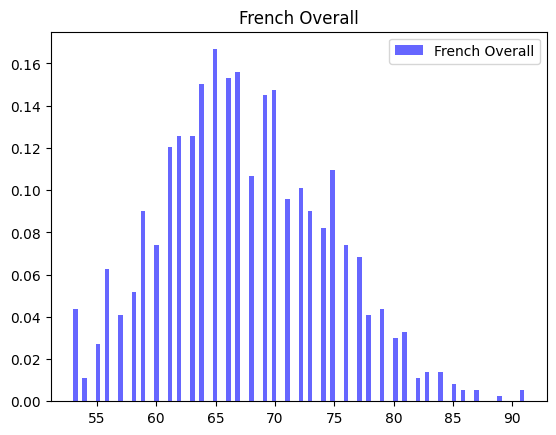

In [381]:
plot_bins(french['Overall'], "French Overall")

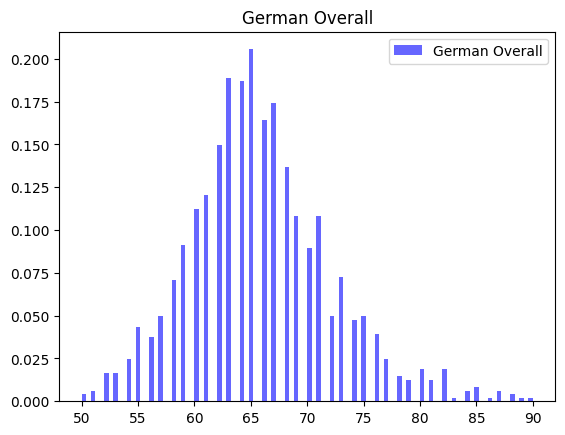

In [382]:
plot_bins(german['Overall'], "German Overall")

3. Связаны ли рейтинг футболиста и его национальность?

In [383]:
nationalities = df['Nationality'].unique()
nationalities

array(['Argentina', 'France', 'Poland', 'Belgium', 'Egypt', 'Germany',
       'Portugal', 'Netherlands', 'England', 'Brazil', 'Korea Republic',
       'Slovenia', 'Senegal', 'Norway', 'Italy', 'Costa Rica', 'Croatia',
       'Spain', 'Scotland', 'Austria', 'Algeria', 'Slovakia', 'Serbia',
       'Gabon', 'Czech Republic', 'Hungary', 'Switzerland', 'Uruguay',
       'Ghana', 'Morocco', 'Turkey', 'Montenegro', 'Cameroon',
       'Bosnia and Herzegovina', 'Colombia', 'Canada', "Côte d'Ivoire",
       'Nigeria', 'Denmark', 'Finland', 'Mexico', 'Ukraine',
       'United States', 'Sweden', 'Central African Republic', 'Mali',
       'Iran', 'Burkina Faso', 'Armenia', 'Wales', 'Greece', 'Guinea',
       'Japan', 'Jamaica', 'Kosovo', 'Chile', 'Ecuador', 'Libya',
       'Russia', 'Tunisia', 'Northern Ireland', 'Mozambique', 'Peru',
       'Togo', 'Romania', 'Congo DR', 'Angola', 'Albania', 'Georgia',
       'Zimbabwe', 'North Macedonia', 'Venezuela', 'Australia',
       'Paraguay', 'Republic of 

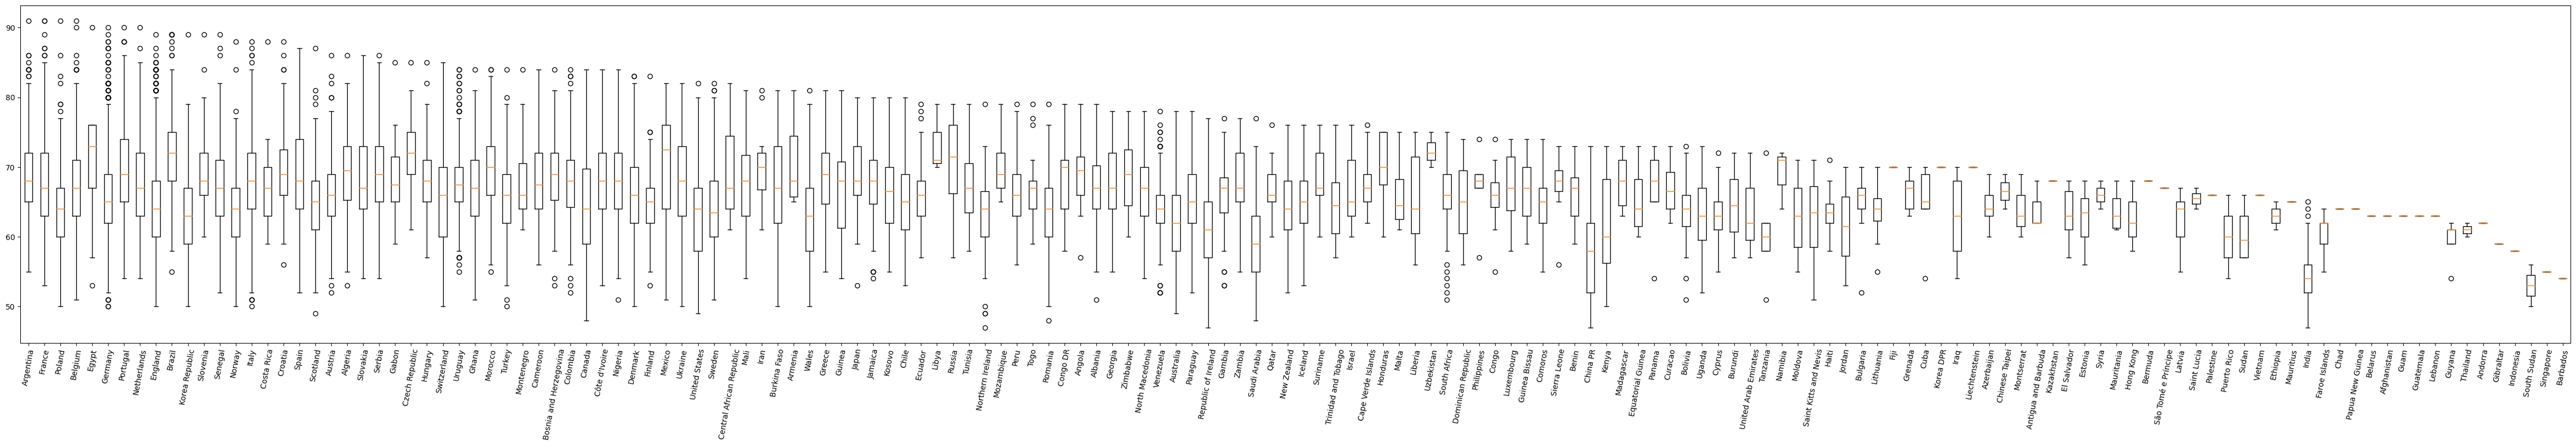

In [384]:
plt.figure(figsize=(60, 8))
plt.boxplot([df[df['Nationality'] == nat]['Overall'] for nat in nationalities])
locs, _ = plt.xticks()
plt.xticks(locs, nationalities, rotation=80)
None

Визуально кажется, что национальность влияет и на медиану, и на дисперсию.

Тест Краскела-Уоллиса

$H_0$: Медианы рейтинга футболистов не зависят от национальности

In [385]:
from scipy.stats import kruskal

h_statistic, p_value_kruskal = kruskal(*(df[df['Nationality'] == nat]['Overall'] for nat in nationalities))
h_statistic, p_value_kruskal

(3989.249084488498, 0.0)

Получается, нулевая гипотеза отвергнута и медианы рейтинга футболистов все-таки зависят от национальности.

Попарный тест Вилкоксона

$H_0$: Распределение рейтинга футболистов разных национальностей одинаково.

In [386]:
from scipy.stats import wilcoxon

sel_size = 500

nationalities = [nat for nat in nationalities if sel_size < len(df[df['Nationality'] == nat])]
# display(nationalities)

wilcoxons = []
for i in range(len(nationalities) - 1):
    for j in range(i + 1, len(nationalities)):
        for _ in range(10):
            s1 = df[df['Nationality'] == nationalities[i]]['Overall'].sample(sel_size)
            s2 = df[df['Nationality'] == nationalities[j]]['Overall'].sample(sel_size)
            wilcoxons.append(wilcoxon(s1, s2)[1])
        
np.array(wilcoxons).mean()

0.03336568446993757

Нулевая гипотеза отвергнута $\Rightarrow$ у рейтинга футболистов разных национальностей разные распределения